In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

/tmp/ipykernel_273382/328324305.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Interdigitated capacitors

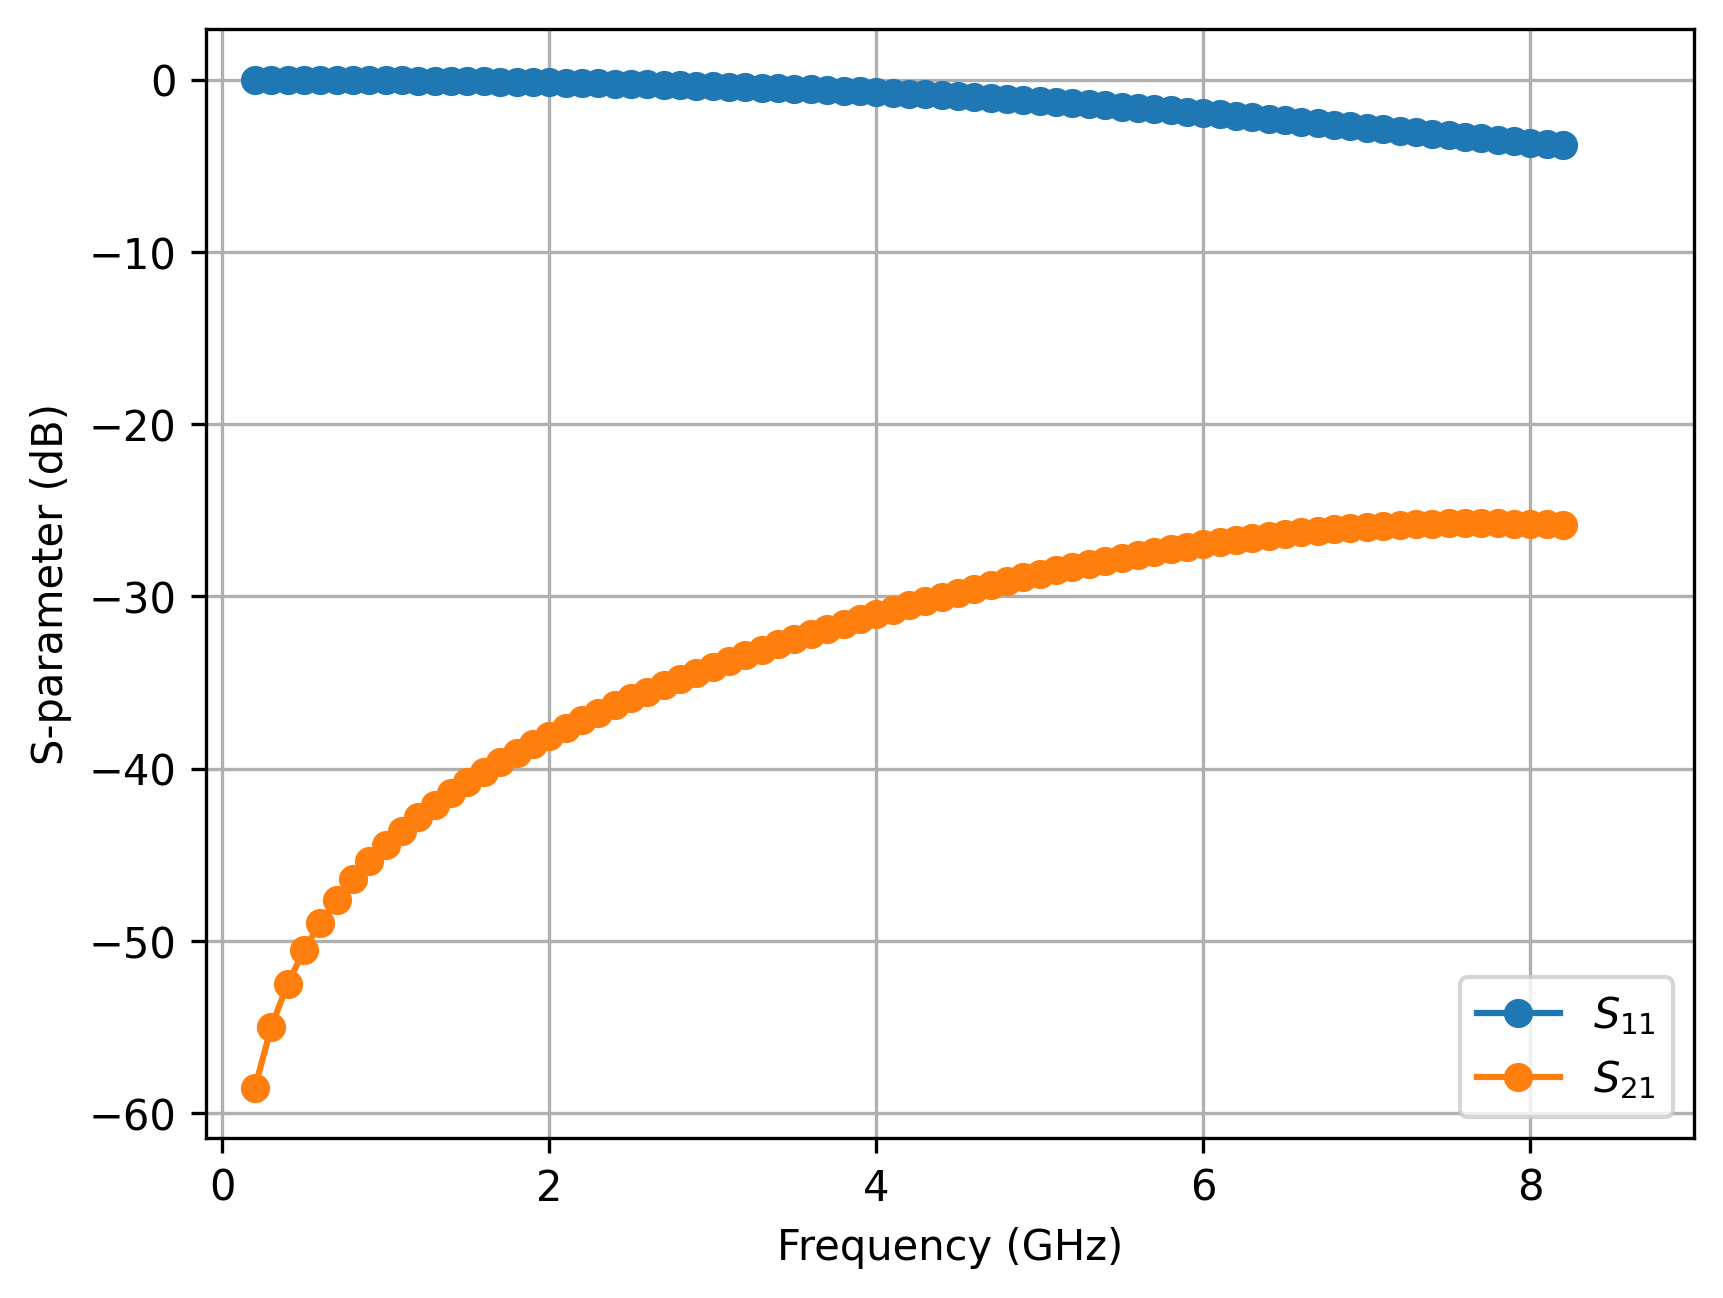

In [2]:
plt.figure(dpi=300)

data = pd.read_csv('postpro/lumped_adaptive/port-S.csv')
df1 = pd.DataFrame(data)

x1 = df1['         f (GHz)']
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o-', label=r'$S_{11}$')

y1 = df1["          |S[2][1]| (dB)"]
plt.plot(x1, y1, 'o-', label=r'$S_{21}$')
plt.legend()
plt.xlim(-0.1, 9)

plt.xlabel('Frequency (GHz)')
plt.ylabel('S-parameter (dB)')
plt.grid()

### Extract the capacitance from S-parameters

In [3]:
import math

s11_lin = [math.pow(10, x/20) for x in df1["          |S[1][1]| (dB)"]]
s11_vec = s11_lin * np.exp(1j*df1['     arg(S[1][1]) (deg.)'])

s21_lin = [math.pow(10, x/20) for x in df1["          |S[2][1]| (dB)"]]
s21_vec = s21_lin * np.exp(1j*df1['     arg(S[2][1]) (deg.)'])

s22_vec = s11_vec

In [4]:
# Define the 2-port S-matrix
c_vec = []
f_vec = df1['         f (GHz)']
for ii in range(len(s11_vec)):
    s_matrix = np.array([[s11_vec[ii], s21_vec[ii]],
                         [s21_vec[ii], s22_vec[ii]]])    
    
    omega = 2 * np.pi *  f_vec[ii] * 1e9 
    # Compute inverse of (I - S) matrix
    inv = np.linalg.inv(np.eye(2) - s_matrix)
    # Compute capacitance matrix C
    c_matrix = (1/omega) * inv
    c_vec.append(np.abs(c_matrix[0][1]))
print(c_matrix)    

[[1.24283370e-11-5.25258444e-12j 1.57306714e-13-4.51633588e-13j]
 [1.57306714e-13-4.51633588e-13j 1.24283370e-11-5.25258444e-12j]]


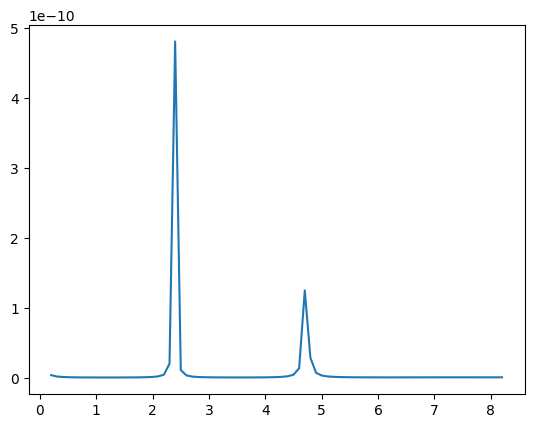

In [159]:
plt.figure()
plt.plot(f_vec, c_vec)
plt.show()

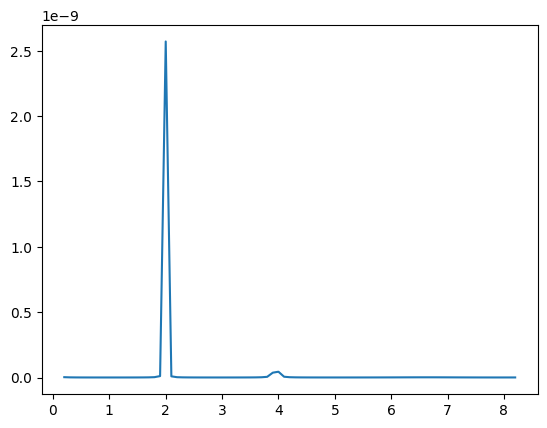

In [5]:
plt.figure()
plt.plot(f_vec, c_vec)
plt.show()

In [154]:
c_vec[np.argmin(abs(f_vec-5))]/1e-12

0.4495213090603913

In [146]:
c_vec[np.argmin(abs(f_vec-5))]/1e-12

0.18070799858830647

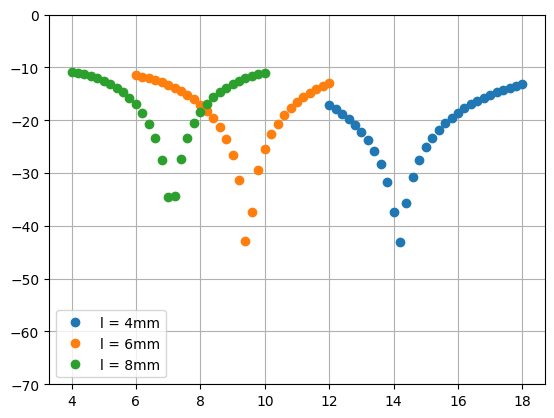

In [37]:
plt.figure()

data = pd.read_csv('postpro/test_cpw_4mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'l = 4mm')

data = pd.read_csv('postpro/test_cpw_6mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'l = 6mm')

data = pd.read_csv('postpro/test_cpw_8mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'l = 8mm')
plt.legend()
plt.ylim(-70, 0)
plt.grid()
plt.show()

# Straight CPW on Si

### With characteristic Z=51 and Z_in

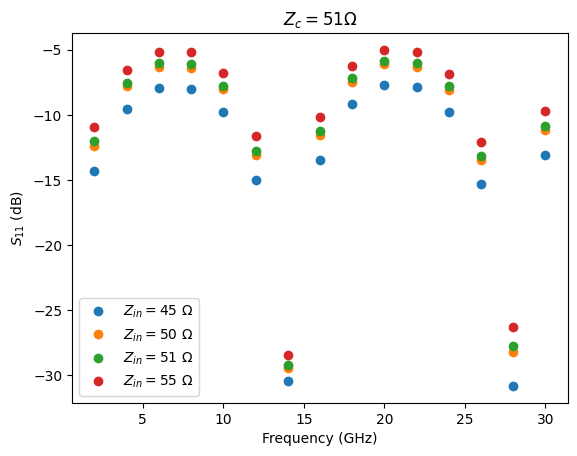

In [87]:
plt.figure()

data = pd.read_csv('postpro/cpw_si_ex_51_45/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $45 $\Omega$')

data = pd.read_csv('postpro/cpw_si_ex_51_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $50 $\Omega$')

data = pd.read_csv('postpro/cpw_si_ex_51_51/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $51 $\Omega$')

data = pd.read_csv('postpro/cpw_si_ex_51_55/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $55 $\Omega$')

plt.title(r'$Z_{c} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

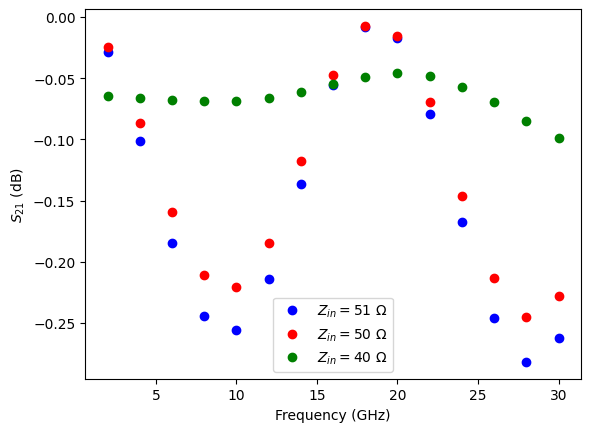

In [65]:

plt.figure()

data = pd.read_csv('postpro/cpw_si_ex_51_51/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[2][1]| (dB)"]
plt.plot(x1, y1, 'bo', label=r'$Z_{in} = $51 $\Omega$')

data = pd.read_csv('postpro/cpw_si_ex_51_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[2][1]| (dB)"]
plt.plot(x1, y1, 'ro', label=r'$Z_{in} = $50 $\Omega$')


data = pd.read_csv('postpro/cpw_si_ex_51_40/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[2][1]| (dB)"]
plt.plot(x1, y1, 'go', label=r'$Z_{in} = $40 $\Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{21}$ (dB)')
plt.legend()
plt.show()

## Straigh CPW section with the design created using rectangles

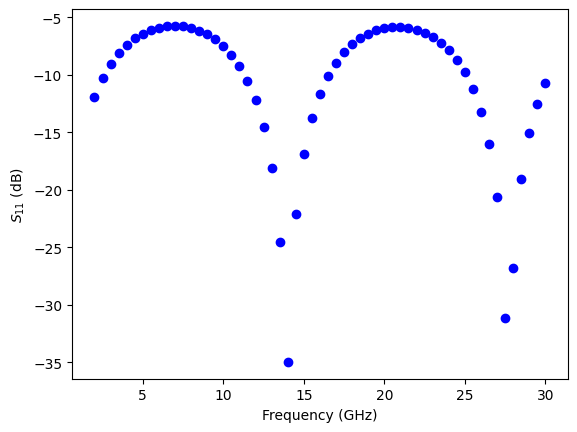

In [23]:
data = pd.read_csv('postpro/lumped_uniform/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.figure()
plt.plot(x1, y1, 'bo')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.show()

# Straight CPW section on Diamond

### With characteristic Z=55 Ohms and ports with Z_in

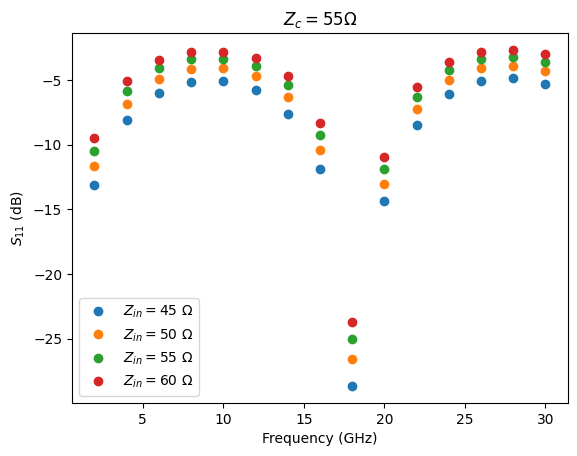

In [88]:
plt.figure()

data = pd.read_csv('postpro/cpw_siv_55_45/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $45 $\Omega$')

data = pd.read_csv('postpro/cpw_siv_55_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $50 $\Omega$')


data = pd.read_csv('postpro/cpw_siv_55_55/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $55 $\Omega$')

data = pd.read_csv('postpro/cpw_siv_55_60/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $60 $\Omega$')

plt.title(r'$Z_{c} = 55 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

### With characteristic Z=50 Ohms and ports with Z_in

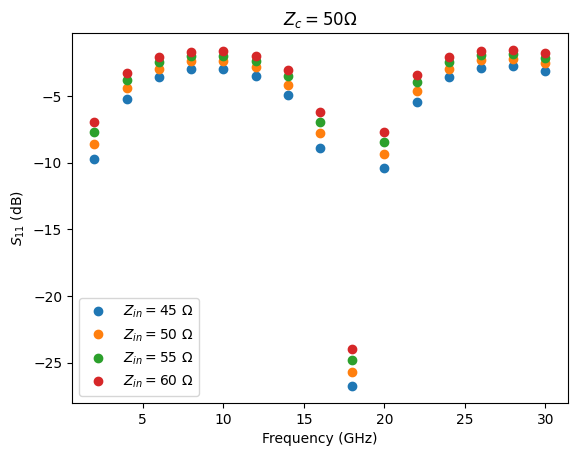

In [93]:
plt.figure()

data = pd.read_csv('postpro/cpw_siv_50_45/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $45 $\Omega$')

data = pd.read_csv('postpro/cpw_siv_50_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $50 $\Omega$')


data = pd.read_csv('postpro/cpw_siv_50_55/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $55 $\Omega$')

data = pd.read_csv('postpro/cpw_siv_50_60/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{in} = $60 $\Omega$')

plt.title(r'$Z_{c} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

## Compare Z_c=50 and 55 matched to 50 Ohm

-2.831666622
-4.70051998


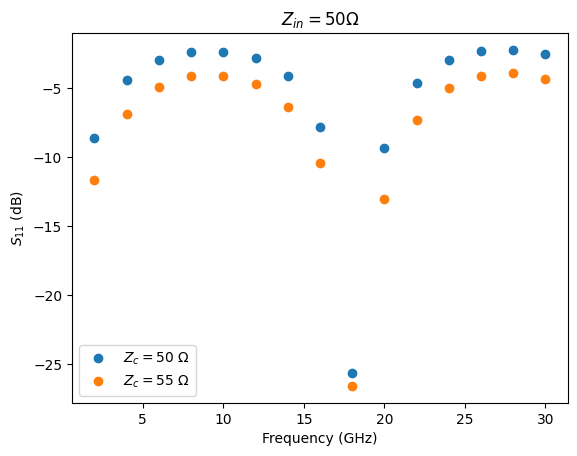

In [94]:
plt.figure()

data = pd.read_csv('postpro/cpw_siv_50_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{c} = $50 $\Omega$')

print(y1[np.argmin(abs(x1-12))])

data = pd.read_csv('postpro/cpw_siv_55_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{c} = $55 $\Omega$')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(
plt.show()b

-3.197178042
-1.797263924


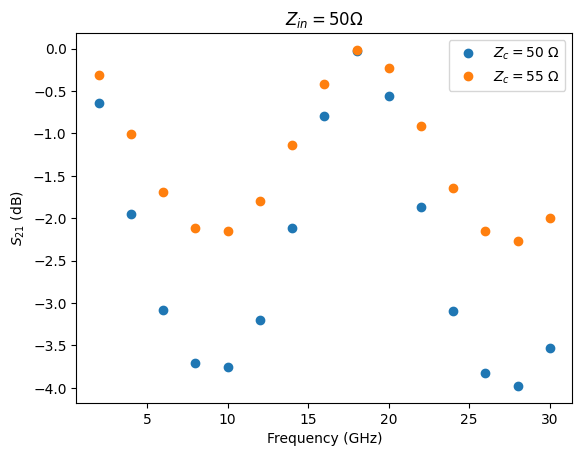

In [96]:
plt.figure()

data = pd.read_csv('postpro/cpw_siv_50_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[2][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{c} = $50 $\Omega$')

print(y1[np.argmin(abs(x1-12))])

data = pd.read_csv('postpro/cpw_siv_55_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[2][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{c} = $55 $\Omega$')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{21}$ (dB)')
plt.legend()
plt.show()

## Matched to 50 Ohms

-8.001639539
-11.29979545


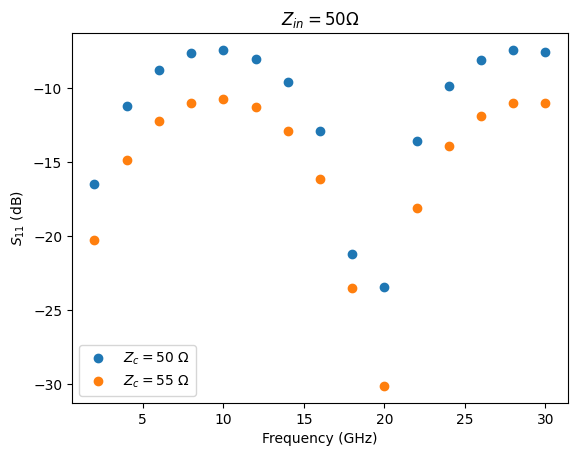

In [108]:
plt.figure()

data = pd.read_csv('postpro/cpw_siv_50_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{c} = $50 $\Omega$')

print(y1[np.argmin(abs(x1-12))])

data = pd.read_csv('postpro/cpw_siv_55_50/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'$Z_{c} = $55 $\Omega$')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

# Compare CPW design with Z=50 Ohm but different dimensions

-2.933622896
-2.944271587
-2.79892895


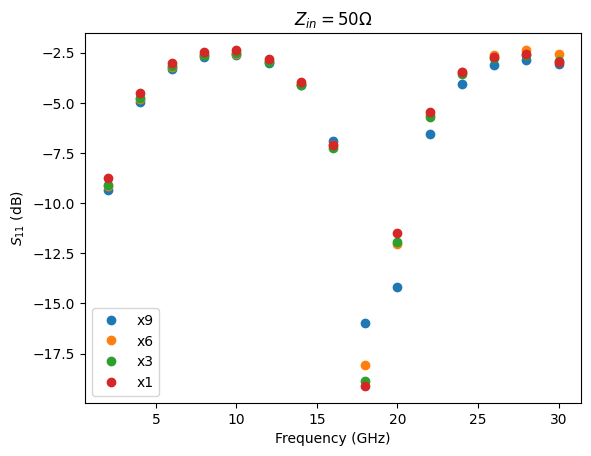

In [111]:
plt.figure()

data = pd.read_csv('postpro/cpw_siv_50_x9/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x9')


data = pd.read_csv('postpro/cpw_siv_50_x6/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x6')

print(y1[np.argmin(abs(x1-12))])

data = pd.read_csv('postpro/cpw_siv_50_x3/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x3')
print(y1[np.argmin(abs(x1-12))])

data = pd.read_csv('postpro/cpw_siv_50_x1/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

### After changing the characteristic mesh length from 1.5 to 0.5

-7.975703984
-2.944271587
-7.970493606


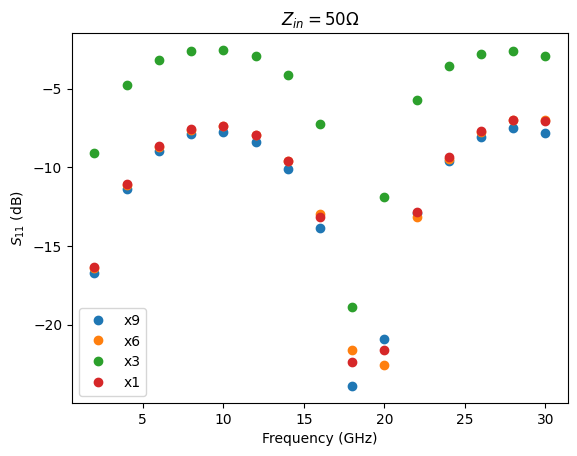

In [114]:

plt.figure()

data = pd.read_csv('postpro/cpw_siv_50_x9/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x9')


data = pd.read_csv('postpro/cpw_siv_50_x6/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x6')

print(y1[np.argmin(abs(x1-12))])

data = pd.read_csv('postpro/cpw_siv_50_x3/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x3')
print(y1[np.argmin(abs(x1-12))])

data = pd.read_csv('postpro/cpw_siv_50_x1/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

-11.3914183


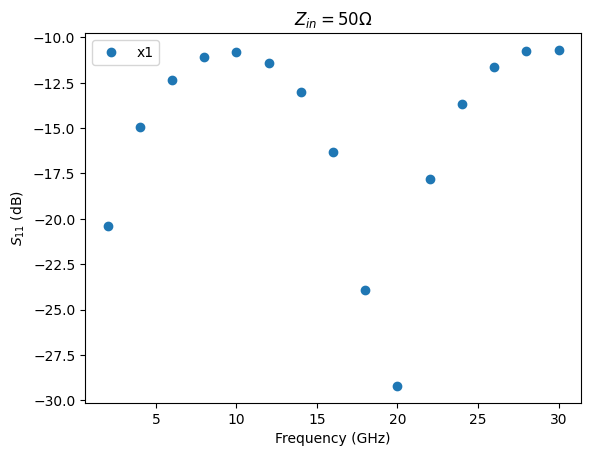

In [115]:
"""With l_trace = 0.25"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_50_x1/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

-10.06687996


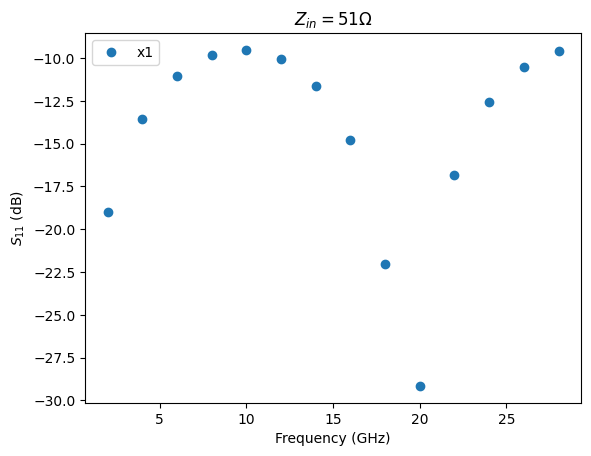

In [117]:
"""With l_trace = 0.25, Z0=51 based on Sonnet"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_51_51/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

### Straight CPW on Diamond chip with length 4mm and 6mm

-2.379860504
-20.74747523


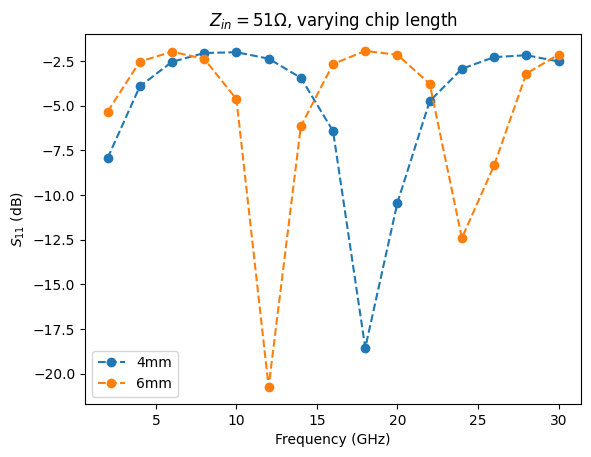

In [122]:
"""With l_trace = 1.5, Z0=51 based on Sonnet"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_51_4mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o--', label=r'4mm')
print(y1[np.argmin(abs(x1-12))])


data = pd.read_csv('postpro/cpw_siv_51_6mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o--', label=r'6mm')
print(y1[np.argmin(abs(x1-12))])

plt.title(r'$Z_{in} = 51 \Omega$, varying chip length')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

## SiV Taper

-8.114591455


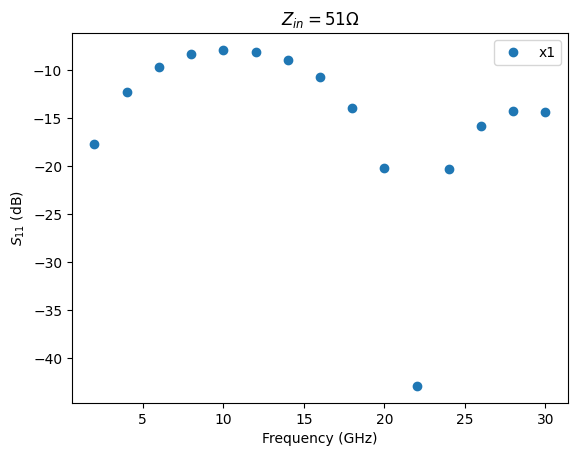

In [119]:
"""With l_trace = 0.25, Z0=51 based on Sonnet"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_taper_51/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

-9.285900514


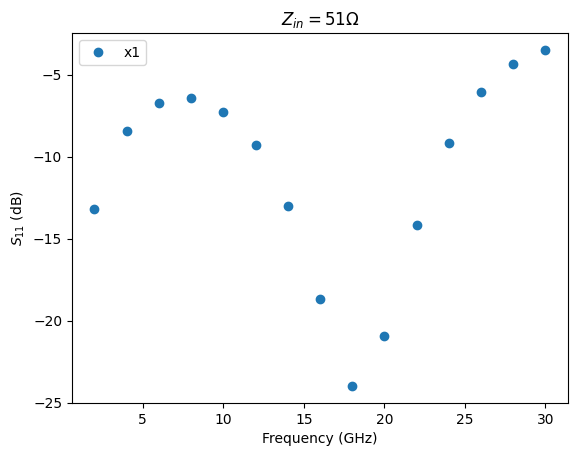

In [120]:
"""With l_trace = 0.25, Z0=51 based on Sonnet"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_taper_51/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

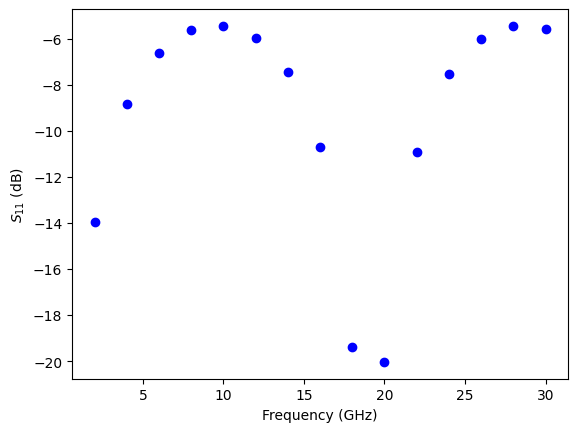

In [61]:
data = pd.read_csv('cpw/postpro/lumped_uniform/port-S.csv')
df2 = pd.DataFrame(data)

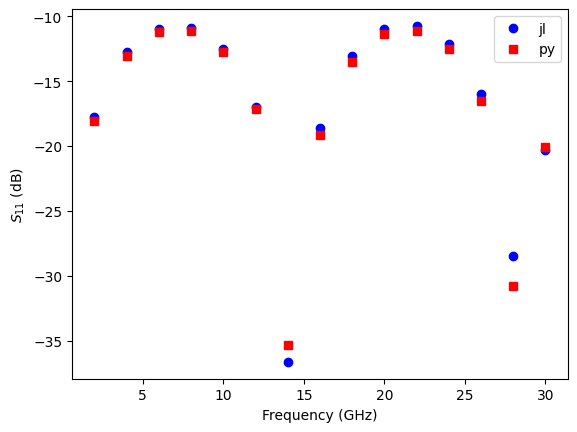

In [62]:
x2 = df2["      f (GHz)"]
y2 = df2["          |S[1][1]| (dB)"]

plt.plot(x2, y2, 'bo', label='jl')
plt.plot(x1, y1, 'rs', label='py')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

In [79]:
data = pd.read_csv('postpro/lumped_uniform/port-I.csv')
df1 = pd.DataFrame(data)
data = pd.read_csv('postpro/lumped_uniform/port-V.csv')
df2 = pd.DataFrame(data)

# x1 = df1["      f (GHz)"]
# y1 = df1["          |S[1][1]| (dB)"]
# plt.figure()
# plt.plot(x1, y1, 'bo')
# plt.xlabel('Frequency (GHz)')
# plt.ylabel(r'$S_{11}$ (dB)')
# plt.show()

In [78]:
df1

,f (GHz),I_inc[1],Re{I[1]},Im{I[1]},Re{I[2]},Im{I[2]}
0,2.0,7.386869,6.918870,-1.199930,6.775903,-2.644506
1,4.0,7.386869,5.833219,-1.759004,5.246937,-4.639455
2,6.0,7.386869,4.728334,-1.534604,3.353837,-5.821817
3,8.0,7.386869,4.015962,-0.763502,1.432866,-6.369138
4,10.0,7.386869,3.860498,0.236268,-0.449427,-6.470831
5,12.0,7.386869,4.286668,1.164023,-2.347003,-6.171694
6,14.0,7.386869,5.212044,1.711129,-4.276698,-5.349400
7,16.0,7.386869,6.364069,1.575676,-6.056885,-3.787938
8,18.0,7.386869,7.210539,0.665058,-7.214663,-1.427343
9,20.0,7.386869,7.217436,-0.615190,-7.240318,1.315918


In [80]:
df2

,f (GHz),V_inc[1],Re{V[1]},Im{V[1]},Re{V[2]},Im{V[2]}
0,2.0,1.0,0.936645,-0.162441,0.917290,-0.358001
1,4.0,1.0,0.789674,-0.238126,0.710306,-0.628068
2,6.0,1.0,0.640100,-0.207748,0.454027,-0.788131
3,8.0,1.0,0.543662,-0.103359,0.193975,-0.862224
4,10.0,1.0,0.522616,0.031985,-0.060841,-0.875991
5,12.0,1.0,0.580309,0.157580,-0.317726,-0.835495
6,14.0,1.0,0.705582,0.231645,-0.578959,-0.724177
7,16.0,1.0,0.861538,0.213308,-0.819953,-0.512793
8,18.0,1.0,0.976129,0.090033,-0.976688,-0.193227
9,20.0,1.0,0.977063,-0.083282,-0.980161,0.178143


#Probing the field at a point

In [13]:
data = pd.read_csv('postpro/cpw_siv_51_4mm/probe-B.csv')
df1 = pd.DataFrame(data)

In [6]:
np.abs(df1['             Re{B_x}[1]}']  + 1j* df1['             Im{B_x}[1]}'])

0     1.641444
1     1.641854
2     1.644039
3     1.646823
4     1.650465
5     1.654742
6     1.659771
7     1.665514
8     1.671929
9     1.679090
10    1.686832
11    1.695186
12    1.704119
13    1.713598
14    1.723607
dtype: float64

In [7]:
np.abs(df1['             Re{B_x}[2]}']  + 1j* df1['             Im{B_x}[2]}'])

0     0.434578
1     0.429952
2     0.435817
3     0.442922
4     0.455171
5     0.464793
6     0.475994
7     0.488597
8     0.502506
9     0.518852
10    0.534387
11    0.550720
12    0.567770
13    0.585449
14    0.604593
dtype: float64

In [11]:
bx_field = (df1['             Re{B_x}[1]}']  + 1j* df1['             Im{B_x}[1]}'])**2
by_field = (df1['             Re{B_y}[1]}']  + 1j* df1['             Im{B_y}[1]}'])**2
bz_field = (df1['             Re{B_z}[1]}']  + 1j* df1['             Im{B_z}[1]}'])**2

b_field = abs(bx_field + by_field + bz_field)

b_field

0     114.574676
1     114.724213
2     114.959435
3     115.288105
4     115.710971
5     116.226548
6     116.831790
7     117.524577
8     118.302646
9     119.165201
10    120.109159
11    121.131153
12    122.228291
13    123.397614
14    124.635931
dtype: float64

In [12]:
bx_field = (df1['             Re{B_x}[2]}']  + 1j* df1['             Im{B_x}[2]}'])**2
by_field = (df1['             Re{B_y}[2]}']  + 1j* df1['             Im{B_y}[2]}'])**2
bz_field = (df1['             Re{B_z}[2]}']  + 1j* df1['             Im{B_z}[2]}'])**2

b_field = abs(bx_field + by_field + bz_field)

b_field

0     4040.259588
1     4050.825179
2     4057.704041
3     4069.164319
4     4082.838629
5     4101.774174
6     4124.008388
7     4149.501701
8     4178.226298
9     4209.391599
10    4244.318731
11    4282.139034
12    4322.735772
13    4366.002686
14    4411.418895
dtype: float64

In [69]:
data = pd.read_csv('postpro/cpw_siv_51_st_2mm/probe-B.csv')
df1 = pd.DataFrame(data)

bx_field = (df1['             Re{B_x}[1]}']  + 1j* df1['             Im{B_x}[1]}'])**2
by_field = (df1['             Re{B_y}[1]}']  + 1j* df1['             Im{B_y}[1]}'])**2
bz_field = (df1['             Re{B_z}[1]}']  + 1j* df1['             Im{B_z}[1]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

bx_field = (df1['             Re{B_x}[2]}']  + 1j* df1['             Im{B_x}[2]}'])**2
by_field = (df1['             Re{B_y}[2]}']  + 1j* df1['             Im{B_y}[2]}'])**2
bz_field = (df1['             Re{B_z}[2]}']  + 1j* df1['             Im{B_z}[2]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

bx_field = (df1['             Re{B_x}[3]}']  + 1j* df1['             Im{B_x}[3]}'])**2
by_field = (df1['             Re{B_y}[3]}']  + 1j* df1['             Im{B_y}[3]}'])**2
bz_field = (df1['             Re{B_z}[3]}']  + 1j* df1['             Im{B_z}[3]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

0.02053909549599972
0.02053909549599972
0.011561063803150287


In [71]:
data = pd.read_csv('postpro/cpw_siv_51_st_2mm/probe-B.csv')
df1 = pd.DataFrame(data)

bx_field = (df1['             Re{B_x}[1]}']  + 1j* df1['             Im{B_x}[1]}'])**2
by_field = (df1['             Re{B_y}[1]}']  + 1j* df1['             Im{B_y}[1]}'])**2
bz_field = (df1['             Re{B_z}[1]}']  + 1j* df1['             Im{B_z}[1]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

bx_field = (df1['             Re{B_x}[2]}']  + 1j* df1['             Im{B_x}[2]}'])**2
by_field = (df1['             Re{B_y}[2]}']  + 1j* df1['             Im{B_y}[2]}'])**2
bz_field = (df1['             Re{B_z}[2]}']  + 1j* df1['             Im{B_z}[2]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

bx_field = (df1['             Re{B_x}[3]}']  + 1j* df1['             Im{B_x}[3]}'])**2
by_field = (df1['             Re{B_y}[3]}']  + 1j* df1['             Im{B_y}[3]}'])**2
bz_field = (df1['             Re{B_z}[3]}']  + 1j* df1['             Im{B_z}[3]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

0.05546850515487829
0.05546850515487829
0.03261254115718718


-23.50704739


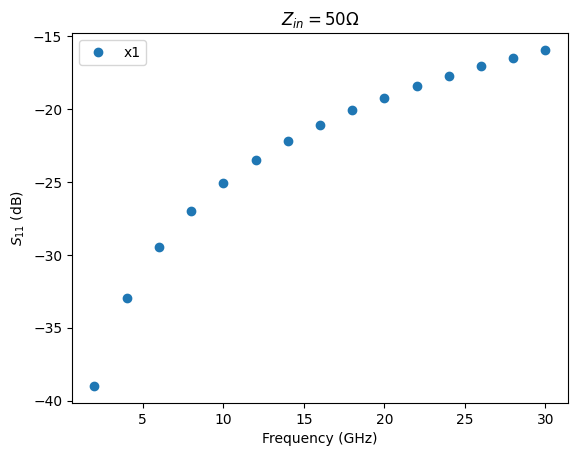

In [22]:
"""With l_trace = 0.25"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_51_4mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

-2.688759887


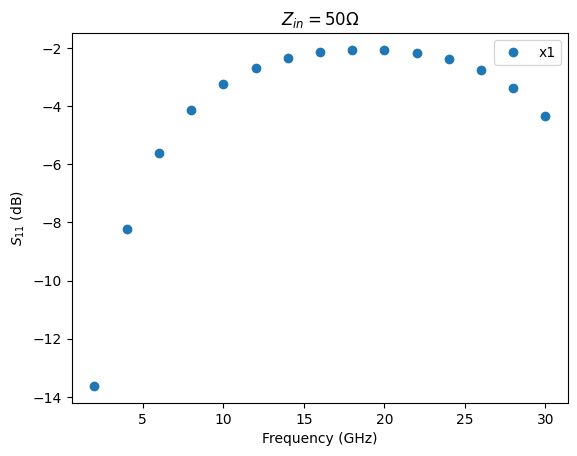

In [29]:
"""With l_trace = 0.25"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_51_st_2mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

-2.377394277
-2.476827239


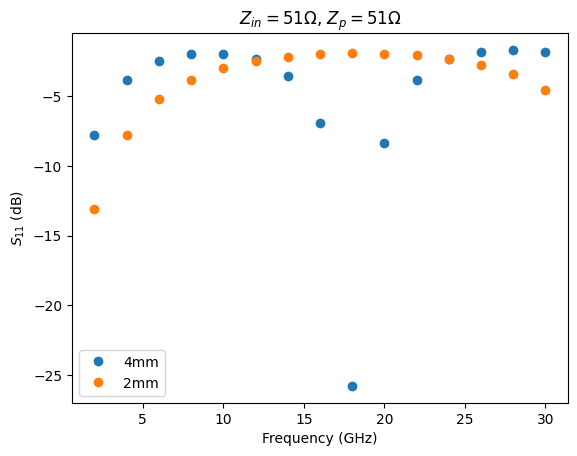

In [44]:
"""With l_trace = 1.5"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_51_st_4mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'4mm')
print(y1[np.argmin(abs(x1-12))])
data = pd.read_csv('postpro/cpw_siv_51_st_2mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'2mm')
print(y1[np.argmin(abs(x1-12))])

plt.title(r'$Z_{in} = 51 \Omega$, $Z_{p} = 51 \Omega$')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

-2.864992336


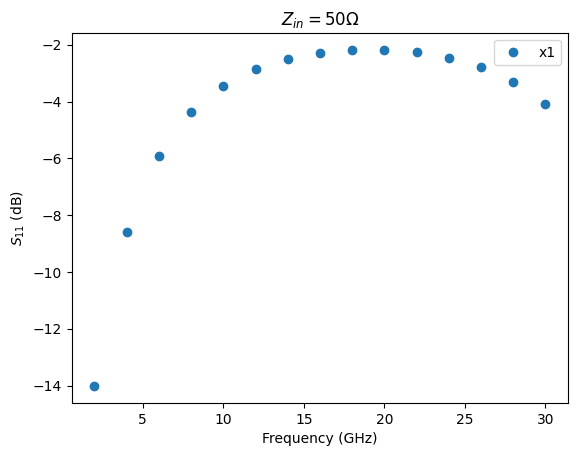

In [72]:
"""With l_trace = 1.5"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_51_st_2mm/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

In [73]:
# Grounded

-0.0001221673675


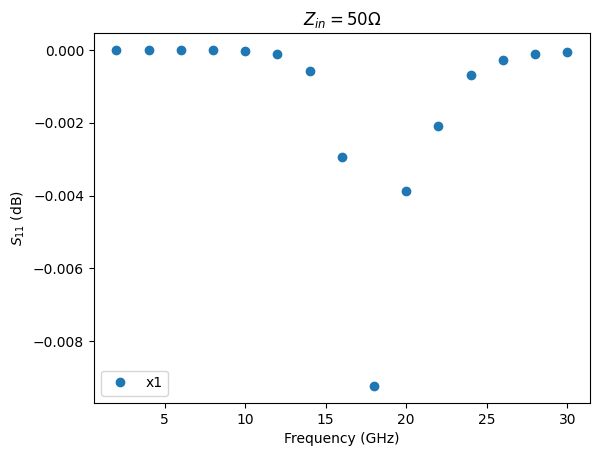

In [74]:
"""With l_trace = 1.5"""

plt.figure()

data = pd.read_csv('postpro/cpw_siv_51_st_grounded/port-S.csv')
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, 'o', label=r'x1')
print(y1[np.argmin(abs(x1-12))])


plt.title(r'$Z_{in} = 50 \Omega$')
plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

In [77]:
data = pd.read_csv('postpro/cpw_siv_51_st_grounded/probe-B.csv')
df1 = pd.DataFrame(data)

bx_field = (df1['             Re{B_x}[1]}']  + 1j* df1['             Im{B_x}[1]}'])**2
by_field = (df1['             Re{B_y}[1]}']  + 1j* df1['             Im{B_y}[1]}'])**2
bz_field = (df1['             Re{B_z}[1]}']  + 1j* df1['             Im{B_z}[1]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

bx_field = (df1['             Re{B_x}[2]}']  + 1j* df1['             Im{B_x}[2]}'])**2
by_field = (df1['             Re{B_y}[2]}']  + 1j* df1['             Im{B_y}[2]}'])**2
bz_field = (df1['             Re{B_z}[2]}']  + 1j* df1['             Im{B_z}[2]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

bx_field = (df1['             Re{B_x}[3]}']  + 1j* df1['             Im{B_x}[3]}'])**2
by_field = (df1['             Re{B_y}[3]}']  + 1j* df1['             Im{B_y}[3]}'])**2
bz_field = (df1['             Re{B_z}[3]}']  + 1j* df1['             Im{B_z}[3]}'])**2

b_field = abs(bx_field + by_field + bz_field)

print(b_field[0])

0.002426649535636635
0.002426649535636635
0.001725983369498672


## Sweep Port Z

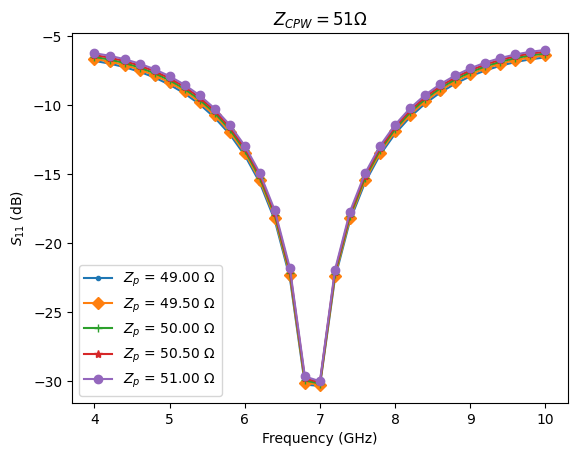

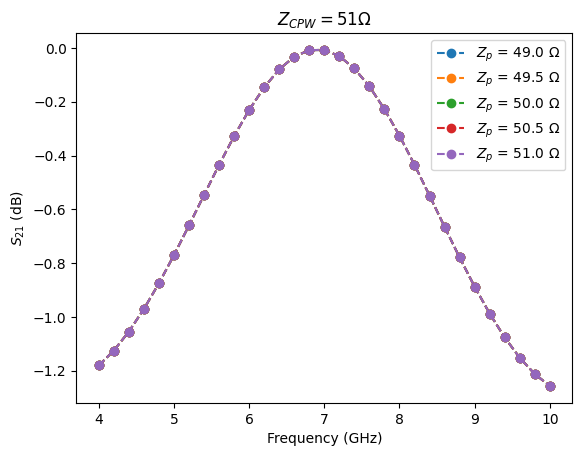

In [89]:
START = 49  # Start value of the sweep
END = 51 # Stop value of the sweep
STEPS = 5 # number of sweep steps

parameters = np.linspace(START, END, STEPS)

markers =['.', 'D', '+', '*', 'o']

plt.figure()
for ii, f in enumerate(parameters):
    data_path = 'sweep/postpro/cpw_51_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[1][1]| (dB)"]
    plt.plot(x1, y1, marker= markers[ii], label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

plt.figure()
for ii in range(5):
    data_path = 'sweep/postpro/cpw_51_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[2][1]| (dB)"]
    plt.plot(x1, y1, 'o--', label=r'$Z_{p}$ = %.1f $\Omega$'%parameters[ii])

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{21}$ (dB)')
plt.legend()
plt.show()

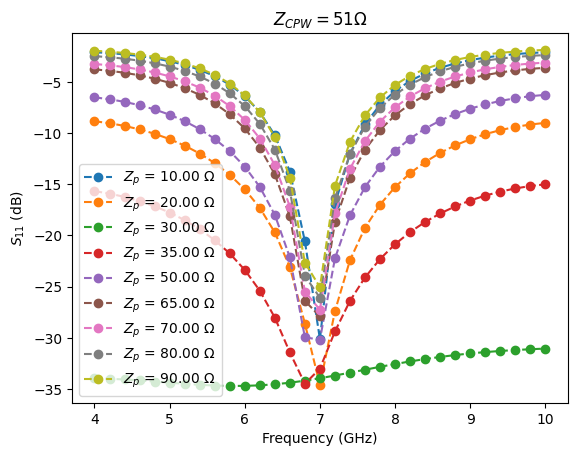

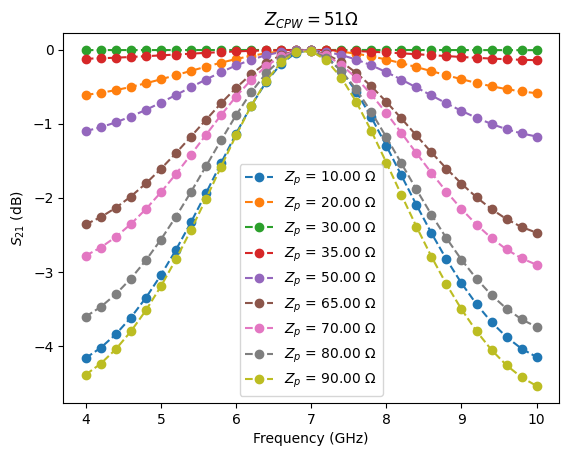

In [73]:
START = 10  # Start value of the sweep
END = 90 # Stop value of the sweep
STEPS = 5 # number of sweep steps

parameters = list(np.linspace(START, END, STEPS))
parameters.extend([20., 35., 65., 80.])

parameters = np.sort(np.array(parameters))

plt.figure()
for ii, f in enumerate(parameters):
    data_path = 'sweep/postpro/cpw_51_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[1][1]| (dB)"]
    plt.plot(x1, y1, 'o--', label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend()
plt.show()

plt.figure()
for ii, f in enumerate(parameters):
    data_path = 'sweep/postpro/cpw_51_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[2][1]| (dB)"]
    plt.plot(x1, y1, 'o--', label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{21}$ (dB)')
plt.legend()
plt.show()

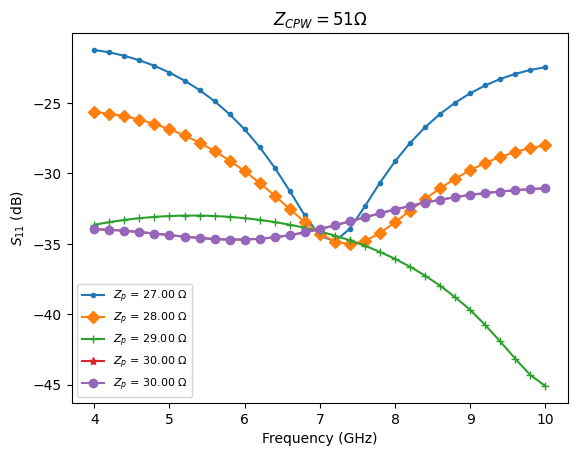

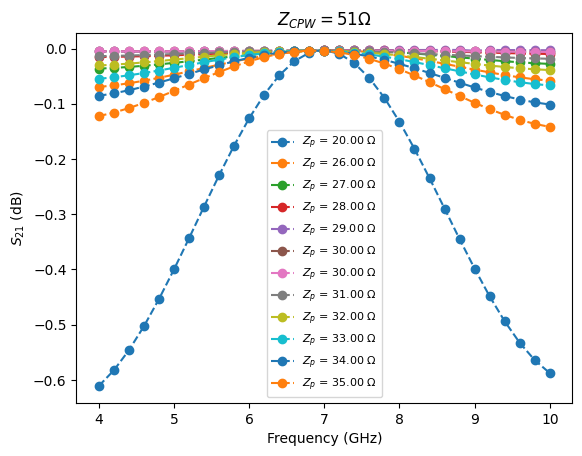

In [88]:
START = 26  # Start value of the sweep
END = 34 # Stop value of the sweep
STEPS = 9 # number of sweep steps

parameters = list(np.linspace(START, END, STEPS))
parameters.extend([20., 30.0, 35.])

parameters = np.sort(np.array(parameters))


markers =['.', 'D', '+', '*', 'o']

plt.figure()
for ii, f in enumerate(parameters[2:7]):
    data_path = 'sweep/postpro/cpw_51_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[1][1]| (dB)"]
    plt.plot(x1, y1, marker= markers[ii], label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

plt.figure()
for ii, f in enumerate(parameters):
    data_path = 'sweep/postpro/cpw_51_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[2][1]| (dB)"]
    plt.plot(x1, y1, 'o--', label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{21}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

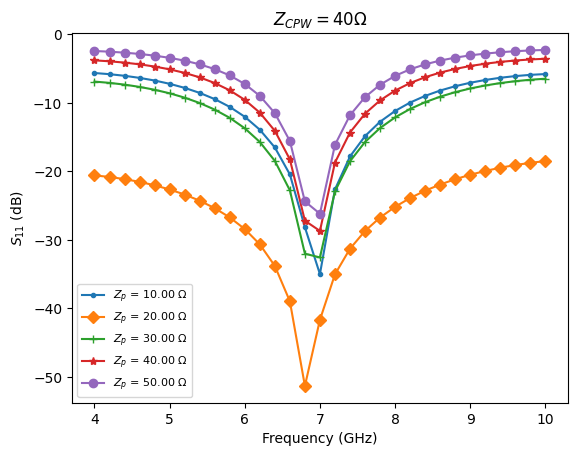

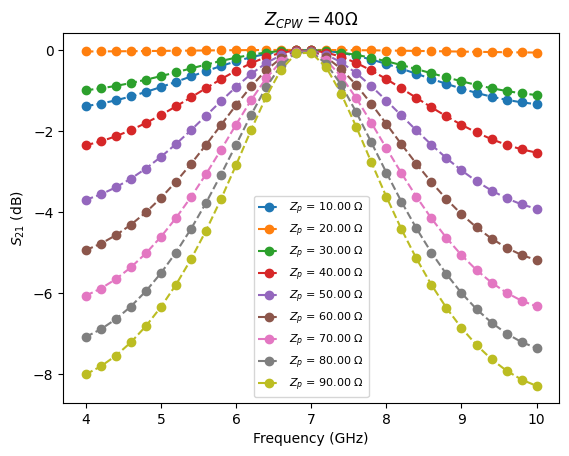

In [91]:
START = 10  # Start value of the sweep
END = 90 # Stop value of the sweep
STEPS = 9 # number of sweep steps

parameters = list(np.linspace(START, END, STEPS))
# parameters.extend([20., 30.0, 35.])

# parameters = np.sort(np.array(parameters))

markers =['.', 'D', '+', '*', 'o']

plt.figure()
for ii, f in enumerate(parameters[:5]):
    data_path = 'sweep/postpro/cpw_40_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[1][1]| (dB)"]
    plt.plot(x1, y1, marker=markers[ii], label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 40 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

plt.figure()
for ii, f in enumerate(parameters):
    data_path = 'sweep/postpro/cpw_40_Ohm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[2][1]| (dB)"]
    plt.plot(x1, y1, 'o--', label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 40 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{21}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

### Port 2 is left open

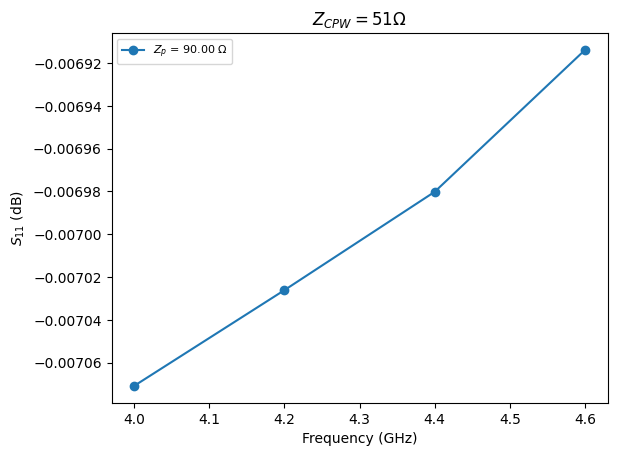

In [95]:
markers =['.', 'D', '+', '*', 'o']

plt.figure()
data_path = 'postpro/test_cpw_4mm_51_Ohm/port-S.csv'
data = pd.read_csv(data_path)
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, marker=markers[-1], label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

### Single CPW with a short at the other end

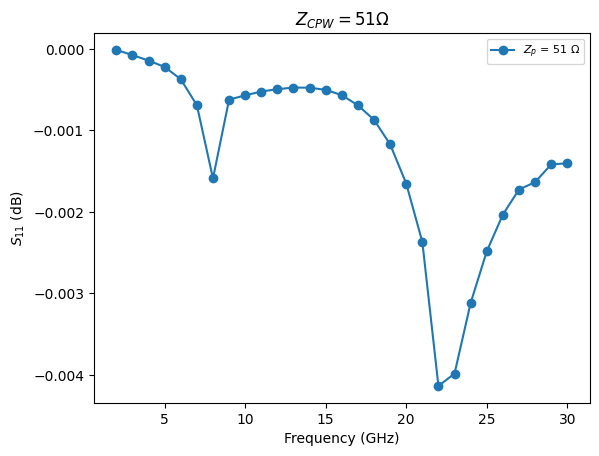

In [100]:
markers =['.', 'D', '+', '*', 'o']

plt.figure()
data_path = 'postpro/test_cpw_grounded/port-S.csv'
data = pd.read_csv(data_path)
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, marker=markers[-1], label=r'$Z_{p}$ = 51 $\Omega$')

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

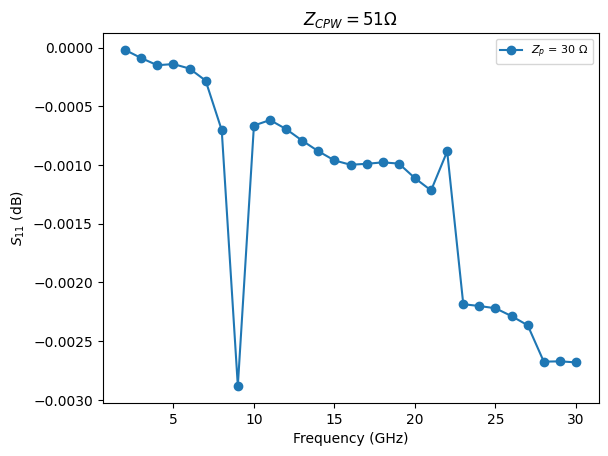

In [122]:
markers =['.', 'D', '+', '*', 'o']

plt.figure()
data_path = 'postpro/test_cpw_grounded/port-S.csv'
data = pd.read_csv(data_path)
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, marker=markers[-1], label=r'$Z_{p}$ = 30 $\Omega$')

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

In [114]:
30*(10/9)/np.sqrt(6)/4

3.402069087198859

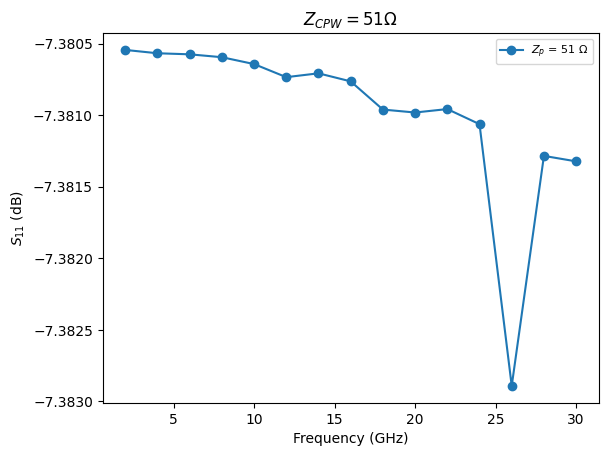

In [131]:
markers =['.', 'D', '+', '*', 'o']

plt.figure()
data_path = 'postpro/test_cpw_grounded_8mm/port-S.csv'
data = pd.read_csv(data_path)
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, marker=markers[-1], label=r'$Z_{p}$ = 51 $\Omega$')
plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

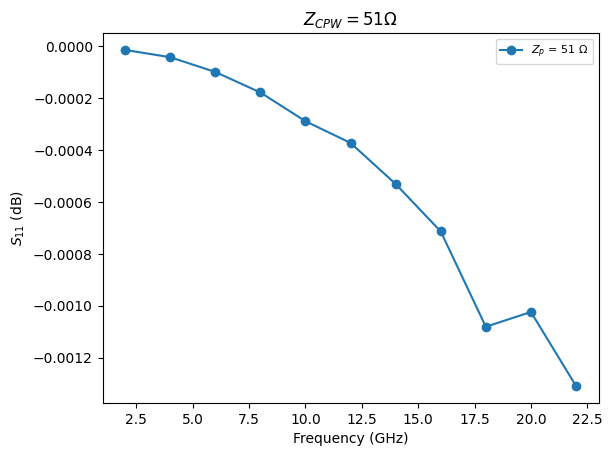

In [133]:
markers =['.', 'D', '+', '*', 'o']

plt.figure()
data_path = 'postpro/test_cpw_grounded_8mm/port-S.csv'
data = pd.read_csv(data_path)
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, marker=markers[-1], label=r'$Z_{p}$ = 51 $\Omega$')
plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

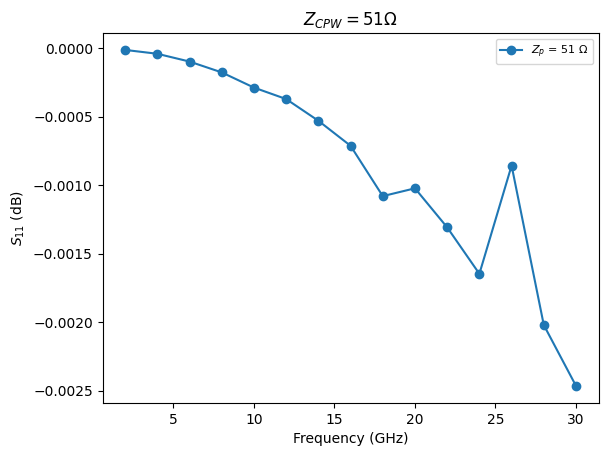

In [135]:
markers =['.', 'D', '+', '*', 'o']

plt.figure()
data_path = 'postpro/test_cpw_grounded_8mm/port-S.csv'
data = pd.read_csv(data_path)
df1 = pd.DataFrame(data)
x1 = df1["      f (GHz)"]
y1 = df1["          |S[1][1]| (dB)"]
plt.plot(x1, y1, marker=markers[-1], label=r'$Z_{p}$ = 51 $\Omega$')
plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()

## Varying the port impdeance of a shorted CPW

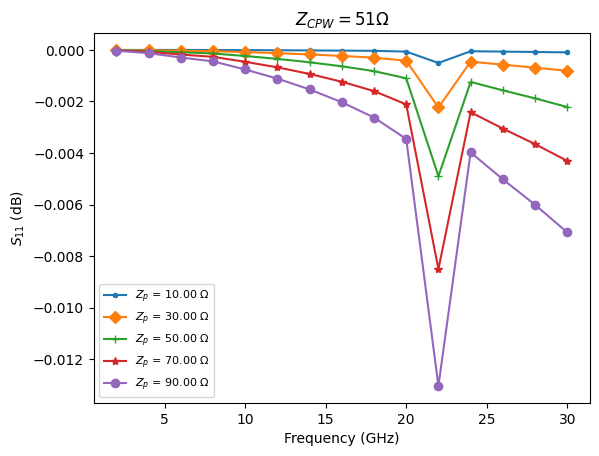

In [145]:
START = 10  # Start value of the sweep
END = 90 # Stop value of the sweep
STEPS = 5 # number of sweep steps

parameters = list(np.linspace(START, END, STEPS))

markers =['.', 'D', '+', '*', 'o']

plt.figure()
for ii, f in enumerate(parameters[:5]):
    data_path = 'sweep/postpro/test_cpw_grounded_4mm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[1][1]| (dB)"]
    plt.plot(x1, y1, marker=markers[ii], label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')

plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()


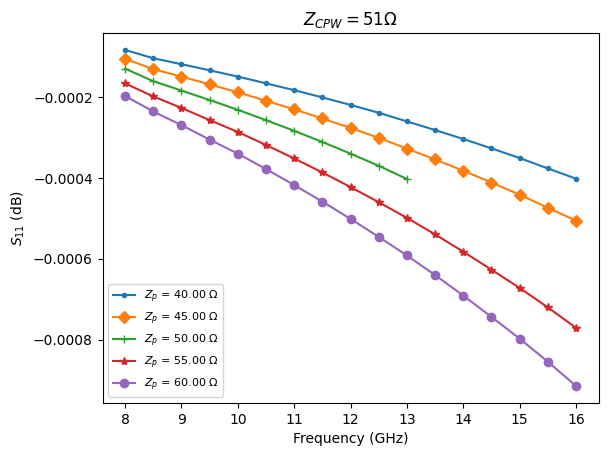

In [153]:
START = 40  # Start value of the sweep
END = 60 # Stop value of the sweep
STEPS = 5 # number of sweep steps

parameters = list(np.linspace(START, END, STEPS))

markers =['.', 'D', '+', '*', 'o']

plt.figure()
for ii, f in enumerate(parameters[:]):
    data_path = 'sweep/postpro/test_cpw_grounded_4mm/test_cpw_'+str(f)+'/port-S.csv'
    data = pd.read_csv(data_path)
    df1 = pd.DataFrame(data)
    x1 = df1["      f (GHz)"]
    y1 = df1["          |S[1][1]| (dB)"]
    plt.plot(x1, y1, marker=markers[ii], label=r'$Z_{p}$ = %.2f $\Omega$'%f)

plt.title(r'$Z_{CPW} = 51 \Omega$')


plt.xlabel('Frequency (GHz)')
plt.ylabel(r'$S_{11}$ (dB)')
plt.legend(fontsize=8, loc='best')
plt.show()
